In [ ]:
!nvidia-smi

Mon Nov  9 15:02:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
train_labels[0]

5

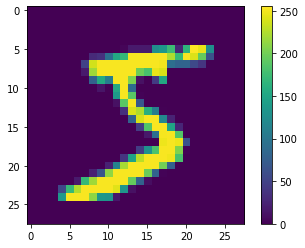

In [ ]:
plt.figure()
plt.imshow(train_images[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
train_images[0].shape

(28, 28, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels[0]

5

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,
                        kernel_size=(3,3),
                        activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64,
                        kernel_size=(3, 3),
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64,
                        kernel_size=(3,3),
                        activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_images, y=train_labels,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 7s 9ms/step - loss: 0.2019 - accuracy: 0.9362 - val_loss: 0.0720 - val_accuracy: 0.9778
Epoch 2/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0527 - accuracy: 0.9835 - val_loss: 0.0561 - val_accuracy: 0.9837
Epoch 3/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.0384 - val_accuracy: 0.9893
Epoch 4/30
750/750 [==============================] - 6s 9ms/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.0390 - val_accuracy: 0.9887
Epoch 5/30
750/750 [==============================] - 6s 9ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0434 - val_accuracy: 0.9886
Epoch 6/30
750/750 [==============================] - 6s 9ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0459 - val_accuracy: 0.9881
Epoch 7/30
750/750 [==============================] - 6s 9ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0424 - val_accuracy: 0.9912
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0791 - accuracy: 0.9922


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

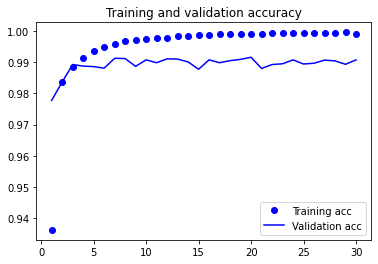

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

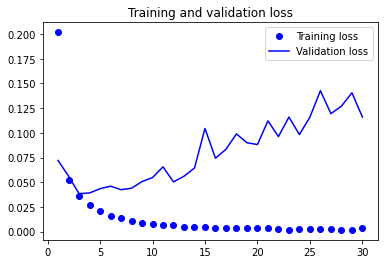

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np

In [ ]:
test_images[0].shape

(28, 28, 1)

In [ ]:
predict = model.predict(test_images[0].reshape(1, 28, 28, 1))
print(predict)
print(np.argmax(predict))

[[5.4406831e-38 1.6918914e-25 7.2190620e-33 1.9033441e-29 2.4248997e-33
  2.9652264e-35 0.0000000e+00 1.0000000e+00 2.3451069e-34 2.8131505e-31]]
7


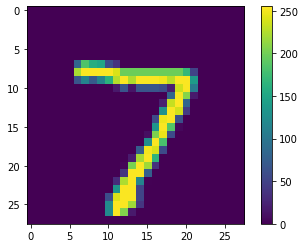

In [ ]:
plt.figure()
plt.imshow(test_images[0].reshape(28, 28)*255)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
model.save('./checkpoint')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./checkpoint/assets


In [ ]:
import tensorflow as tf

In [ ]:
new_model = tf.keras.models.load_model('./checkpoint')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
new_model.evaluate(x=test_images, y=test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0791 - accuracy: 0.9922


[0.07913272082805634, 0.9922000169754028]